In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df_raw1= pd.read_csv("IoTPond2.csv", delimiter = ",",low_memory=False)

In [4]:
df_raw1.head(5)

,created_at,entry_id,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36


In [5]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [6]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [7]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

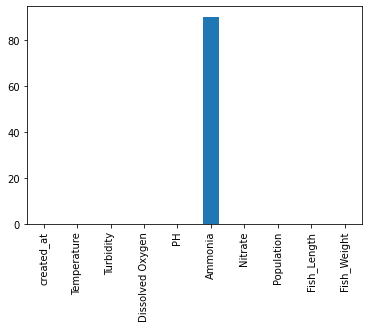

In [8]:
df_raw1.isna().sum().plot.bar()

In [9]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [10]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [12]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [13]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:00:05,2021-06-19,00:00:05
1,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36,2021-06-19 00:01:02,2021-06-19,00:01:02
2,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36,2021-06-19 00:01:22,2021-06-19,00:01:22
3,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:01:44,2021-06-19,00:01:44
4,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36,2021-06-19 00:02:07,2021-06-19,00:02:07


Sort DataFrame by Date (Datetime)

In [14]:
df=df_raw1.sort_values(by='Datetime') 

In [ ]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [15]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,172249.0000,172249.0000,172249.0000,172249.0000,172159.0000,172249.0000,172249.0000,172249.0000,172249.0000,172249
mean,24.9828,90.9747,9.7085,3.9719,311210983.1726,719.8914,50.0000,23.4288,166.4705,2021-08-26 04:58:27.203571456
min,-127.0000,1.0000,0.0070,-3.1374,0.0066,45.0000,50.0000,6.9600,3.3600,2021-06-19 00:00:05
25%,24.3750,94.0000,3.2000,-0.1732,0.5694,189.0000,50.0000,14.2200,22.8900,2021-07-14 17:52:44
50%,24.9375,100.0000,3.2830,7.0990,8.4706,890.0000,50.0000,20.9700,65.4800,2021-08-13 17:46:18
75%,25.5000,100.0000,11.7390,7.5167,80.7052,1050.0000,50.0000,32.5400,302.5000,2021-10-04 01:55:21
max,27.8125,100.0000,41.0460,8.5517,996512956416.0000,2224.0000,50.0000,35.3900,394.6600,2021-10-31 04:33:00
std,0.9019,21.0999,10.9720,3.9607,12578088893.1127,415.9798,0.0000,9.6098,145.7527,NaN


We have 172249 records. There are 90 records where Ammonia reading is missing. Start date- 19th of June,'21 and end date- 31st of Oct,'21

In [16]:
d=df["Date"].unique()
print(len(d))
d

111


array([datetime.date(2021, 6, 19), datetime.date(2021, 6, 20),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),
       datetime.date(2021, 7, 1), datetime.date(2021, 7, 2),
       datetime.date(2021, 7, 3), datetime.date(2021, 7, 4),
       datetime.date(2021, 7, 5), datetime.date(2021, 7, 6),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 8),
       datetime.date(2021, 7, 9), datetime.date(2021, 7, 10),
       datetime.date(2021, 7, 11), datetime.date(2021, 7, 12),
       datetime.date(2021, 7, 13), datetime.date(2021, 7, 14),
       datetime.date(2021, 7, 15), datetime.date(2021, 7, 16),
       datetime.date(2021, 7, 17), datetime.date(2021, 7, 18),
       datetime.date(2021, 7, 19), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),
 

In [17]:
a=df["Fish_Weight"].unique()
print(len(a))
a

111


array([  3.36,   4.06,   4.76,   5.46,   6.16,   6.86,   7.56,   9.66,
        10.36,  11.06,  11.76,  12.46,  13.1 ,  13.99,  14.88,  15.77,
        16.66,  17.55,  18.44,  19.33,  20.22,  21.11,  22.  ,  22.89,
        23.78,  24.67,  25.5 ,  27.  ,  28.5 ,  30.  ,  31.5 ,  33.  ,
        34.5 ,  36.  ,  37.5 ,  39.  ,  40.5 ,  42.  ,  43.5 ,  45.  ,
        46.5 ,  47.96,  49.42,  50.88,  52.34,  53.8 ,  55.26,  56.72,
        58.18,  59.64,  61.01,  62.56,  64.02,  65.48,  67.  ,  70.6 ,
        74.2 ,  77.8 ,  81.4 ,  88.6 ,  92.2 ,  95.8 ,  99.4 , 113.8 ,
       117.4 , 120.5 , 123.6 , 126.7 , 129.8 , 136.  , 139.1 , 142.2 ,
       198.44, 207.85, 217.26, 226.67, 236.08, 254.9 , 264.31, 273.72,
       283.23, 292.6 , 293.7 , 294.8 , 295.9 , 297.  , 298.1 , 299.2 ,
       300.3 , 301.4 , 302.5 , 303.6 , 304.7 , 305.8 , 306.9 , 308.  ,
       312.15, 316.3 , 320.45, 324.6 , 328.75, 357.8 , 366.1 , 369.67,
       373.24, 376.81, 380.38, 383.95, 387.52, 391.09, 394.66])

In [18]:
start=a[0]
print(d[0])
for i in range(len(a)-1):
    print(i)
    print(d[i+1],'-----------',a[i+1]-start)
    start=a[i+1]

2021-06-19
0
2021-06-20 ----------- 0.6999999999999997
1
2021-06-21 ----------- 0.7000000000000002
2
2021-06-22 ----------- 0.7000000000000002
3
2021-06-23 ----------- 0.7000000000000002
4
2021-06-24 ----------- 0.7000000000000002
5
2021-06-25 ----------- 0.6999999999999993
6
2021-06-28 ----------- 2.1000000000000005
7
2021-06-29 ----------- 0.6999999999999993
8
2021-06-30 ----------- 0.7000000000000011
9
2021-07-01 ----------- 0.6999999999999993
10
2021-07-02 ----------- 0.7000000000000011
11
2021-07-03 ----------- 0.6399999999999988
12
2021-07-04 ----------- 0.8900000000000006
13
2021-07-05 ----------- 0.8900000000000006
14
2021-07-06 ----------- 0.8899999999999988
15
2021-07-07 ----------- 0.8900000000000006
16
2021-07-08 ----------- 0.8900000000000006
17
2021-07-09 ----------- 0.8900000000000006
18
2021-07-10 ----------- 0.889999999999997
19
2021-07-11 ----------- 0.8900000000000006
20
2021-07-12 ----------- 0.8900000000000006
21
2021-07-13 ----------- 0.8900000000000006
22
2021-07

In [19]:
rec_where_ammonia_are_na=df[df["Ammonia"].isna() ]

In [20]:
rec_where_ammonia_are_na

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
12388,25.0000,100,6.664,8.20667,NaN,178,50,8.71,6.86,2021-06-24 22:44:08,2021-06-24,22:44:08
13842,25.0000,100,11.397,7.96608,NaN,148,50,10.11,9.66,2021-06-28 20:15:21,2021-06-28,20:15:21
13861,25.0000,100,9.723,7.95700,NaN,134,50,10.11,9.66,2021-06-28 20:28:42,2021-06-28,20:28:42
17088,24.8750,100,7.336,7.89799,NaN,141,50,10.46,10.36,2021-06-29 20:04:40,2021-06-29,20:04:40
17108,24.8750,100,7.032,7.89799,NaN,135,50,10.46,10.36,2021-06-29 20:11:11,2021-06-29,20:11:11
...,...,...,...,...,...,...,...,...,...,...,...,...
160772,25.0000,88,10.644,-1.81193,NaN,971,50,35.11,380.38,2021-10-27 04:38:12,2021-10-27,04:38:12
164077,25.4375,55,31.822,-1.90725,NaN,635,50,35.18,383.95,2021-10-28 12:32:13,2021-10-28,12:32:13
164398,25.6875,46,38.694,-1.89364,NaN,779,50,35.18,383.95,2021-10-28 14:51:21,2021-10-28,14:51:21
171754,26.2500,59,13.440,-1.81647,NaN,992,50,35.39,394.66,2021-10-31 01:04:41,2021-10-31,01:04:41


In [21]:
rec_From_the_Date=df[df["Date"]== d[5]]
rec_From_the_Date

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
11098,24.1250,100,2.916,8.27476,0.38,144,50,8.71,6.86,2021-06-24 00:00:15,2021-06-24,00:00:15
11099,24.1250,100,5.096,8.28384,0.38,142,50,8.71,6.86,2021-06-24 00:00:35,2021-06-24,00:00:35
11100,24.1250,100,6.271,8.28838,0.38,142,50,8.71,6.86,2021-06-24 00:00:55,2021-06-24,00:00:55
11101,24.1250,100,4.783,8.28384,0.38,143,50,8.71,6.86,2021-06-24 00:03:24,2021-06-24,00:03:24
11102,24.1250,100,11.909,8.27476,0.38,141,50,8.71,6.86,2021-06-24 00:03:44,2021-06-24,00:03:44
...,...,...,...,...,...,...,...,...,...,...,...,...
12458,24.9375,100,8.418,8.18851,0.38,159,50,8.71,6.86,2021-06-24 23:55:25,2021-06-24,23:55:25
12459,24.8750,100,23.269,8.20213,0.38,159,50,8.71,6.86,2021-06-24 23:56:24,2021-06-24,23:56:24
12460,24.9375,100,10.387,8.19759,0.38,158,50,8.71,6.86,2021-06-24 23:58:17,2021-06-24,23:58:17
12461,24.9375,100,8.655,8.19305,0.38,155,50,8.71,6.86,2021-06-24 23:58:56,2021-06-24,23:58:56


I am going to drop all the records where Ammonia is missing

In [23]:
i = df[(df.Ammonia.isna())].index
df.drop(i,inplace=True)

In [24]:
df.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,172159.000000,172159.000000,172159.000000,172159.000000,1.721590e+05,172159.000000,172159.0,172159.000000,172159.000000
mean,24.982995,90.971277,9.708489,3.970836,3.112110e+08,720.111885,50.0,23.432115,166.509262
std,0.902002,21.103767,10.973028,3.960685,1.257809e+10,415.910404,0.0,9.608815,145.741210
min,-127.000000,1.000000,0.007000,-3.137450,6.590000e-03,45.000000,50.0,6.960000,3.360000
25%,24.375000,94.000000,3.200000,-0.173180,5.693500e-01,190.000000,50.0,14.220000,22.890000
50%,24.937500,100.000000,3.279000,7.099040,8.470560e+00,890.000000,50.0,20.970000,65.480000
75%,25.500000,100.000000,11.739000,7.516670,8.070516e+01,1050.000000,50.0,32.540000,302.500000
max,27.812500,100.000000,41.046000,8.551670,9.965130e+11,2224.000000,50.0,35.390000,394.660000


In [25]:
df.to_csv('Pond2.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [26]:
df= pd.read_csv("Pond2.csv", delimiter = ",",low_memory=False )

In [27]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [28]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:00:05,2021-06-19,00:00:05
1,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36,2021-06-19 00:01:02,2021-06-19,00:01:02
2,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36,2021-06-19 00:01:22,2021-06-19,00:01:22
3,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:01:44,2021-06-19,00:01:44
4,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36,2021-06-19 00:02:07,2021-06-19,00:02:07


In [29]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [30]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:00:05,2021-06-19,00:00:05,NaT
1,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36,2021-06-19 00:01:02,2021-06-19,00:01:02,0 days
2,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36,2021-06-19 00:01:22,2021-06-19,00:01:22,0 days
3,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:01:44,2021-06-19,00:01:44,0 days
4,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36,2021-06-19 00:02:07,2021-06-19,00:02:07,0 days


In [31]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [32]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [33]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:00:05,2021-06-19,00:00:05,0.0
1,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36,2021-06-19 00:01:02,2021-06-19,00:01:02,0.0
2,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36,2021-06-19 00:01:22,2021-06-19,00:01:22,0.0
3,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:01:44,2021-06-19,00:01:44,0.0
4,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36,2021-06-19 00:02:07,2021-06-19,00:02:07,0.0


In [34]:
df['Date_diff'].unique()

array([ 0.,  1.,  3.,  2.,  4., 10.,  7.])

In [35]:
p=df[df['Date_diff']>=2]
p       

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
13154,25.0000,100,18.198,7.91615,0.38000,122,50,10.11,9.66,2021-06-28 12:44:33,2021-06-28,12:44:33,3.0
90870,24.1875,100,2.138,7.00371,1.14224,829,50,22.38,88.60,2021-08-20 14:54:40,2021-08-20,14:54:40,2.0
91065,24.8750,100,0.819,6.93562,0.80751,771,50,23.85,113.80,2021-08-27 12:12:09,2021-08-27,12:12:09,4.0
91977,24.2500,100,0.819,6.86753,5.11634,1152,50,25.31,136.00,2021-09-03 14:46:33,2021-09-03,14:46:33,2.0
92363,25.0625,100,1.065,4.47977,1.52905,864,50,28.47,198.44,2021-09-15 14:01:43,2021-09-15,14:01:43,10.0
92535,25.4375,100,4.234,0.42149,3.51286,1035,50,30.63,254.90,2021-09-21 10:31:44,2021-09-21,10:31:44,2.0
150265,25.6875,100,3.200,0.13096,20.26944,1146,50,24.59,357.80,2021-10-21 18:11:11,2021-10-21,18:11:11,7.0
150266,25.5625,100,3.200,0.85274,0.12044,1307,50,34.83,366.10,2021-10-23 18:09:25,2021-10-23,18:09:25,2.0


In [37]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [38]:
df['Weight_diff'].unique()

array([ 0.  ,  0.7 ,  0.7 ,  0.7 ,  2.1 ,  0.7 ,  0.64,  0.89,  0.89,
        0.89,  0.83,  1.5 ,  1.46,  1.46,  1.37,  1.55,  1.46,  1.52,
        3.6 ,  3.6 ,  7.2 , 14.4 ,  3.1 ,  3.1 ,  6.2 , 56.24,  9.41,
        9.41, 18.82,  9.51,  9.37,  1.1 ,  1.1 ,  4.15,  4.15, 29.05,
        8.3 ,  3.57,  3.57])

In [40]:
rec_From_the_Date=df[df["Date"]== d[7]]
rec_From_the_Date

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff
13154,25.0000,100,18.198,7.91615,0.38,122,50,10.11,9.66,2021-06-28 12:44:33,2021-06-28,12:44:33,3.0,2.1
13155,25.0000,100,20.592,7.92523,0.38,119,50,10.11,9.66,2021-06-28 12:44:52,2021-06-28,12:44:52,0.0,0.0
13156,25.0625,100,19.223,7.92069,0.38,115,50,10.11,9.66,2021-06-28 12:45:12,2021-06-28,12:45:12,0.0,0.0
13157,25.0625,100,21.201,7.92523,0.38,115,50,10.11,9.66,2021-06-28 12:45:33,2021-06-28,12:45:33,0.0,0.0
13158,25.0625,100,24.213,7.92069,0.38,115,50,10.11,9.66,2021-06-28 12:45:52,2021-06-28,12:45:52,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14098,24.7500,100,7.125,7.93884,0.38,118,50,10.11,9.66,2021-06-28 23:56:49,2021-06-28,23:56:49,0.0,0.0
14099,24.8125,100,8.764,7.93884,0.38,118,50,10.11,9.66,2021-06-28 23:58:23,2021-06-28,23:58:23,0.0,0.0
14100,24.8125,100,6.339,7.93884,0.38,121,50,10.11,9.66,2021-06-28 23:59:19,2021-06-28,23:59:19,0.0,0.0
14101,24.7500,100,7.023,7.94338,0.38,120,50,10.11,9.66,2021-06-28 23:59:39,2021-06-28,23:59:39,0.0,0.0


In [41]:
date_group=df.groupby("Date", sort = False)

In [42]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,24.8750,100,4.505,8.43365,3.800000e-01,193,50,6.96,3.36,2021-06-19 00:00:05,00:00:05,0.0,0.00
2021-06-20,25.9375,100,9.259,8.38371,3.800000e-01,193,50,7.31,4.06,2021-06-20 00:00:30,00:00:30,1.0,0.70
2021-06-21,25.8750,100,36.428,8.39733,3.800000e-01,176,50,7.66,4.76,2021-06-21 00:00:17,00:00:17,1.0,0.70
2021-06-22,24.7500,100,11.402,8.34740,3.800000e-01,172,50,8.01,5.46,2021-06-22 14:00:41,14:00:41,1.0,0.70
2021-06-23,24.9375,100,6.930,8.32016,3.800000e-01,150,50,8.36,6.16,2021-06-23 00:00:06,00:00:06,1.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,25.5000,70,25.815,-1.74837,1.918900e-01,2151,50,35.11,380.38,2021-10-27 00:04:30,00:04:30,1.0,3.57
2021-10-28,25.8125,82,12.671,-1.85732,8.737000e-02,965,50,35.18,383.95,2021-10-28 00:02:32,00:02:32,1.0,3.57
2021-10-29,25.5000,60,31.966,-1.80739,5.746283e+01,1221,50,35.25,387.52,2021-10-29 00:00:03,00:00:03,1.0,3.57


Shifting the weight difference to the previous day recording since the weight recorded for the current day reflects previous day's water quality.

In [43]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],13]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,13])
    
    

0.6999999999999997
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.7000000000000002
0.6999999999999993
2.1000000000000005
0.6999999999999993
0.7000000000000011
0.6999999999999993
0.7000000000000011
0.6399999999999988
0.8900000000000006
0.8900000000000006
0.8899999999999988
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.889999999999997
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8900000000000006
0.8299999999999983
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.4600000000000009
1.4600000000000009
1.4600000000000009
1.4600000000000009
1.4599999999999937
1.4600000000000009
1.4600000000000009
1.4600000000000009
1.4600000000000009
1.3699999999999974
1.5500000000000043
1.4599999999999937
1.460000000000008
1.519999999999996
3.5999999999999943
3.6000000000000085
3.5999999999999943
3.6000000000000085
7.199999999999989
3.6000000000000085
3.5999999999999943
3.6000000000000085
14.399999999999991
3.600000000000008

In [44]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,24.8750,100,4.505,8.43365,3.800000e-01,193,50,6.96,3.36,2021-06-19 00:00:05,00:00:05,0.0,0.70
2021-06-20,25.9375,100,9.259,8.38371,3.800000e-01,193,50,7.31,4.06,2021-06-20 00:00:30,00:00:30,1.0,0.70
2021-06-21,25.8750,100,36.428,8.39733,3.800000e-01,176,50,7.66,4.76,2021-06-21 00:00:17,00:00:17,1.0,0.70
2021-06-22,24.7500,100,11.402,8.34740,3.800000e-01,172,50,8.01,5.46,2021-06-22 14:00:41,14:00:41,1.0,0.70
2021-06-23,24.9375,100,6.930,8.32016,3.800000e-01,150,50,8.36,6.16,2021-06-23 00:00:06,00:00:06,1.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,25.5000,70,25.815,-1.74837,1.918900e-01,2151,50,35.11,380.38,2021-10-27 00:04:30,00:04:30,1.0,3.57
2021-10-28,25.8125,82,12.671,-1.85732,8.737000e-02,965,50,35.18,383.95,2021-10-28 00:02:32,00:02:32,1.0,3.57
2021-10-29,25.5000,60,31.966,-1.80739,5.746283e+01,1221,50,35.25,387.52,2021-10-29 00:00:03,00:00:03,1.0,3.57


In [45]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,12])
    if (df[df["Date"]==d[i]].iloc[0,12])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-19 ------ 1.0
2021-06-20 ------ 1.0
2021-06-21 ------ 1.0
2021-06-22 ------ 1.0
2021-06-23 ------ 1.0
2021-06-24 ------ 1.0
2021-06-25 ------ 3.0
2021-06-28 ------ 1.0
2021-06-29 ------ 1.0
2021-06-30 ------ 1.0
2021-07-01 ------ 1.0
2021-07-02 ------ 1.0
2021-07-03 ------ 1.0
2021-07-04 ------ 1.0
2021-07-05 ------ 1.0
2021-07-06 ------ 1.0
2021-07-07 ------ 1.0
2021-07-08 ------ 1.0
2021-07-09 ------ 1.0
2021-07-10 ------ 1.0
2021-07-11 ------ 1.0
2021-07-12 ------ 1.0
2021-07-13 ------ 1.0
2021-07-14 ------ 1.0
2021-07-15 ------ 1.0
2021-07-16 ------ 1.0
2021-07-17 ------ 1.0
2021-07-18 ------ 1.0
2021-07-19 ------ 1.0
2021-07-20 ------ 1.0
2021-07-21 ------ 1.0
2021-07-22 ------ 1.0
2021-07-23 ------ 1.0
2021-07-24 ------ 1.0
2021-07-25 ------ 1.0
2021-07-26 ------ 1.0
2021-07-27 ------ 1.0
2021-07-28 ------ 1.0
2021-07-29 ------ 1.0
2021-07-30 ------ 1.0
2021-07-31 ------ 1.0
2021-08-01 ------ 1.0
2021-08-02 ------ 1.0
2021-08-03 ------ 1.0
2021-08-04 ------ 1.0
2021-08-05

In [47]:

rec_From_the_Date=df[df["Date"]== d[109]]
rec_From_the_Date.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date_diff,Weight_diff
count,2766.000000,2766.000000,2766.000000,2766.000000,2.766000e+03,2766.000000,2766.0,2.766000e+03,2.766000e+03,2766.000000,2766.000000
mean,26.125000,55.007231,16.545744,-1.873194,1.570463e+04,973.484454,50.0,3.532000e+01,3.910900e+02,0.000362,0.001291
std,0.260234,7.443430,4.424514,0.105477,1.031597e+05,88.487767,0.0,2.117800e-12,7.732103e-12,0.019014,0.067880
min,25.687500,25.000000,6.845000,-2.860540,1.344000e-02,358.000000,50.0,3.532000e+01,3.910900e+02,0.000000,0.000000
25%,25.875000,53.000000,13.563500,-1.884560,8.321757e+01,957.000000,50.0,3.532000e+01,3.910900e+02,0.000000,0.000000
50%,26.125000,56.000000,15.586500,-1.857320,4.408646e+02,980.000000,50.0,3.532000e+01,3.910900e+02,0.000000,0.000000
75%,26.375000,59.000000,18.517250,-1.834620,2.881257e+03,1008.000000,50.0,3.532000e+01,3.910900e+02,0.000000,0.000000
max,26.625000,81.000000,35.074000,-1.571330,1.730062e+06,2224.000000,50.0,3.532000e+01,3.910900e+02,1.000000,3.570000


In [48]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 25),
 datetime.date(2021, 8, 18),
 datetime.date(2021, 8, 23),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 9, 5),
 datetime.date(2021, 9, 19),
 datetime.date(2021, 10, 14),
 datetime.date(2021, 10, 21),
 datetime.date(2021, 10, 31),
 datetime.date(2021, 10, 31)]

In [49]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [50]:
df.tail(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff
171492,26.3750,61,11.323,-1.83916,6.963725e+05,987,50,35.32,391.09,2021-10-30 23:57:09,2021-10-30,23:57:09,0.0,0.0
171493,26.3750,61,17.605,-2.15692,8.310848e+05,978,50,35.32,391.09,2021-10-30 23:58:43,2021-10-30,23:58:43,0.0,0.0
171494,26.3750,59,20.217,-1.80739,1.055663e+06,983,50,35.32,391.09,2021-10-30 23:59:04,2021-10-30,23:59:04,0.0,0.0
171495,26.3125,61,17.468,-1.82100,5.350850e+05,989,50,35.32,391.09,2021-10-30 23:59:23,2021-10-30,23:59:23,0.0,0.0
171496,26.3750,76,14.742,-1.83008,7.138645e+05,976,50,35.32,391.09,2021-10-30 23:59:43,2021-10-30,23:59:43,0.0,0.0


In [51]:
d[6]

datetime.date(2021, 6, 25)

In [52]:
rec_From_the_Date=df[df["Date"]== d[6]]
rec_From_the_Date

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff


In [53]:
d[11]

datetime.date(2021, 7, 2)

In [54]:
rec_From_the_Date=df[df["Date"]== d[11]]
rec_From_the_Date

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff
22828,25.3125,100,33.616,7.82536,77922.49219,134,50,11.51,12.46,2021-07-02 00:00:04,2021-07-02,00:00:04,1.0,0.64
22829,25.3125,100,11.982,7.81174,106962.94530,134,50,11.51,12.46,2021-07-02 00:00:23,2021-07-02,00:00:23,0.0,0.00
22830,25.3125,100,10.460,7.81628,77922.49219,133,50,11.51,12.46,2021-07-02 00:01:20,2021-07-02,00:01:20,0.0,0.00
22831,25.3125,100,11.918,7.81628,8834.75684,135,50,11.51,12.46,2021-07-02 00:01:59,2021-07-02,00:01:59,0.0,0.00
22832,25.3125,100,9.275,7.81628,13366.67383,134,50,11.51,12.46,2021-07-02 00:02:18,2021-07-02,00:02:18,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26449,25.5000,100,13.031,7.77542,63147.98047,138,50,11.51,12.46,2021-07-02 23:58:14,2021-07-02,23:58:14,0.0,0.00
26450,25.5625,100,11.982,7.81174,36601.32813,139,50,11.51,12.46,2021-07-02 23:58:33,2021-07-02,23:58:33,0.0,0.00
26451,25.5000,100,8.962,7.76180,33466.47266,138,50,11.51,12.46,2021-07-02 23:58:53,2021-07-02,23:58:53,0.0,0.00
26452,25.5000,100,14.489,7.75727,38892.95703,138,50,11.51,12.46,2021-07-02 23:59:13,2021-07-02,23:59:13,0.0,0.00


In [55]:
df.drop("Date_diff",axis=1,inplace=True)


In [56]:
df.to_csv('cleaned_Pond2.csv')